In [1]:
import math, numpy as np

In [2]:
import pandas as pd

In [3]:
from matplotlib import pyplot as plt
import plot_df

In [4]:
import warnings
warnings.filterwarnings("ignore")

# Data loading

In [5]:
df = pd.read_csv("pmf_precompute_objectives_posterior2.py.csv")

In [6]:
K,a,b,c,d = df.K.unique(),df.a.unique(),df.b.unique(),df.c.unique(),df.d.unique()
K,a,b,c,d

(array([8]),
 array([0.03289054]),
 array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
        1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06,
        1.e+07, 1.e+08, 1.e+09]),
 array([0.00044727]),
 array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
        1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06,
        1.e+07, 1.e+08, 1.e+09]))

In [7]:
df["log10(b)"] = df["b"].apply(math.log10)
df["log10(d)"] = df["d"].apply(math.log10)

In [8]:
bd = 4.930661612021052e-05
b = np.array([1.0e-09, 1.0e-08, 1.0e-07, 1.0e-06, 1.0e-05, 1.0e-04, 1.0e-03, 1.0e-02,
        1.0e-01, 1.0e+00, 1.0e+01, 1.0e+02, 1.0e+03, 1.0e+04, 1.0e+05, 1.0e+06,
        1.0e+07, 1.0e+08, 1.0e+09])
d = bd/b

# 2D slices

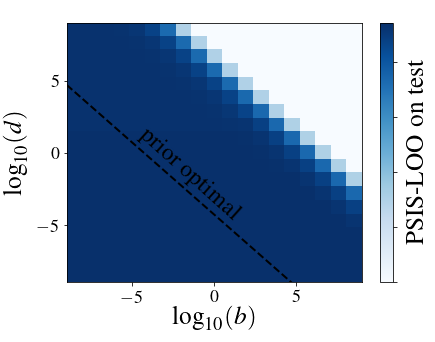

In [9]:
from aux_plt import start_plotting
start_plotting(cmbright=False)
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels


im = plot_df.plot_df2D(df, x_feature1="log10(b)", x_feature2="log10(d)", kind="grid", 
                  y_feature_name="obj", label="PSIS-LOO on test", cmap="Blues", vmin=-3e8, vmax=-2.06e8)

plt.xlabel(r"$\log_{10}(b)$")
plt.ylabel(r"$\log_{10}(d)$")

x1,x2 = plt.xlim()
y1,y2 = plt.ylim()
plt.plot(np.log10(b), np.log10(d), color="black", lw=2, ls="--")
plt.xlim(x1,x2)
plt.ylim(y1,y2)

plt.text(-1.5,-1.5,r"prior optimal", fontsize=24, rotation=-42, ha="center", va="center")
#plt.title(r"$K$=%s, $a$=%.2f, $c$=%.4f (prior optimal)" % (K[0],a[0],c[0]), fontsize=20)


cbar = plt.gca().images[-1].colorbar   
cbar.ax.tick_params(labelcolor="white") 
cbar.set_ticks([],[])
cbar.ax.tick_params(labelsize=0) 


plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.2)    
plt.savefig("prior_posterior_71.pdf")
plt.show()

# 1D slices

In [10]:
args = range(-9,-4,1)
means = []
stds = []
for v in args:
    log10b = log10d = v
    df_slice = df[(df["log10(b)"]==v) & (df["log10(d)"]==v)]["obj"]
    df_slice = np.array(df_slice)
    means.append( df_slice.mean() )
    stds.append( df_slice.std() )
means, stds = np.array(means), np.array(stds)

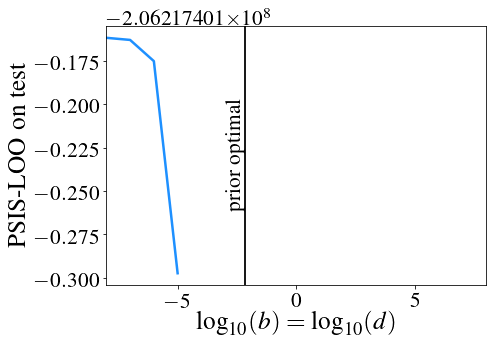

In [11]:
from aux_plt import start_plotting
start_plotting(cmbright=False)
plt.plot(args, means, lw=2.5, color="dodgerblue"); plt.ylabel(r"$\text{PSIS-LOO}$ on test")
plt.xlabel(r"$\log_{10}(b) = \log_{10}(d)$")
plt.axvline(math.log10(0.007), color="k", lw=2)
y1,y2 = plt.ylim(); plt.text(math.log10(0.007), 0.5*(y1+y2), "prior optimal", rotation=90, ha="right", va="center")
plt.xlim(-8,8)
plt.show()

In [12]:
args = range(-9,-1,1)
means = []
stds = []
for v in args:
    log10b = log10d = v
    df_slice = df[(df["log10(b)"]==v) & (df["log10(d)"]==v)]["obj"]
    df_slice = np.array(df_slice)
    means.append( df_slice.mean() )
    stds.append( df_slice.std() )
means, stds = np.array(means), np.array(stds)

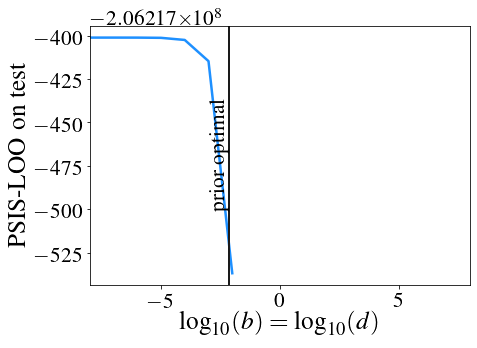

In [13]:
from aux_plt import start_plotting
start_plotting(cmbright=False)
plt.plot(args, means, lw=2.5, color="dodgerblue"); plt.ylabel(r"$\text{PSIS-LOO}$ on test")
plt.xlabel(r"$\log_{10}(b) = \log_{10}(d)$")
plt.axvline(math.log10(0.007), color="k", lw=2)
y1,y2 = plt.ylim(); plt.text(math.log10(0.007), 0.5*(y1+y2), "prior optimal", rotation=90, ha="right", va="center")
plt.xlim(-8,8)
plt.show()